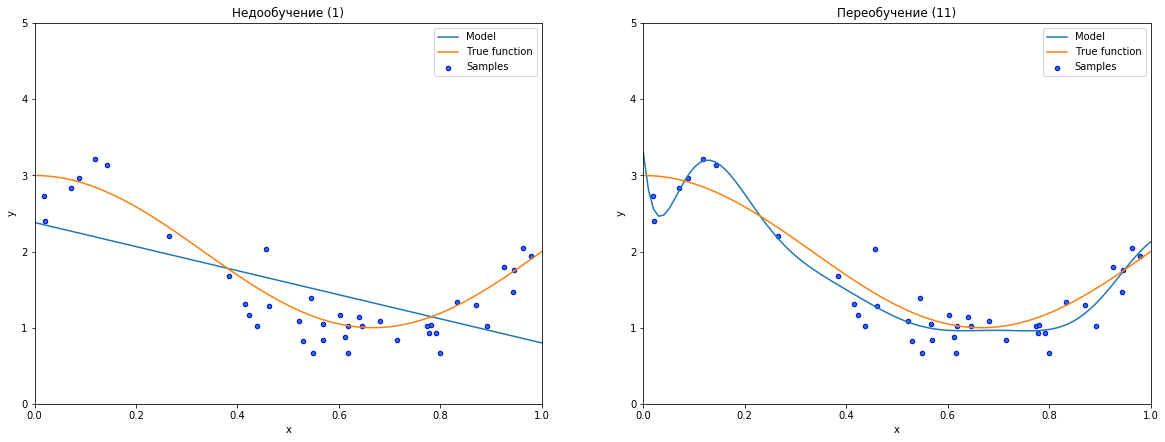

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

def true_fun(X):
    return np.cos(1.5 * np.pi * X) + 2

def make_data(n=30, rseed=0, err = 0.3):
    np.random.seed(rseed)
    X = np.sort(np.random.rand(n))
    y = true_fun(X) + np.random.randn(n) * err
    return X, y

n_samples = 40

X, y = make_data(n_samples);

X_test = np.linspace(0, 1, 100)

plt.figure(figsize = (20,7))

for degree, i, title in zip([1,11], [1,2], ["Недообучение", "Переобучение"]):
    polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features), ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    plt.subplot(1,2,i)
    plt.title('{} ({})'.format(title, degree))
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((0, 5))
    plt.legend(loc="best")
    
plt.savefig('out/underfit_and_overfit.png', dpi=300)

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from ipywidgets import interact
from scipy import stats

%matplotlib inline

X_test = np.linspace(0, 1, 100)

def f(degree=2, n_samples=20, trueFunc=True):

    X, y = make_data(n_samples);

    X2, y2 = make_data(n_samples, 2);

    polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features), ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    plt.figure(figsize = (20,10))
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    if (trueFunc):
        plt.plot(X_test, true_fun(X_test), label="True function")
        
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples");
    plt.scatter(X2, y2, edgecolor='r', s=20, label="Validation");
    plt.title('degree = {}, samples ={}'.format(degree, n_samples));
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((0, 5))
    plt.legend(loc="best")
    plt.text(0.02, 4.98, "эффективность обучения: $R^2$ = {0:.2f}".format(pipeline.score(X[:, np.newaxis], y)), ha='left', va='top', size=14, color='blue')
    plt.text(0.02, 4.7,  "эффективность проверки: $R^2$ = {0:.2f}".format(pipeline.score(X2[:, np.newaxis], y2)), ha='left', va='top', size=14, color='red')
   
    
interact(f, degree=(1,20), n_samples=(10,1000,10), trueFunc=False);

A Jupyter Widget

In [5]:
# Кривая проверки
from sklearn.learning_curve import validation_curve
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),LinearRegression(**kwargs))

degree = np.arange(0, 21)

def f(n_samples = 60, cv=9):
    
    X, y = make_data(n_samples);
    X = X[:, np.newaxis]

    train_score, val_score = validation_curve(PolynomialRegression(), X, y, 'polynomialfeatures__degree', degree, cv=cv)

    plt.figure(figsize=(20,10))
    plt.plot(degree, np.max(train_score, 1), color='blue', label='эффективность обучения')
    plt.plot(degree, np.max(val_score, 1), color='red', label='эффективность проверки')
    plt.legend(loc='best')
    plt.ylim(0, 1)
    plt.xlabel('degree')
    plt.ylabel('score');
    plt.title('{}'.format(n_samples))
    
interact(f, n_samples=(10,100,10), cv=(2,20));

C:\Users\denis\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\denis\Anaconda3\lib\site-packages\sklearn\learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


A Jupyter Widget

In [6]:
from sklearn.learning_curve import learning_curve

    
#fig, ax = plt.subplots(1, 2, figsize=(20, 10))

def f(degree = 2, n_samples=60, cv = 9):
    X, y = make_data(n_samples);
    X = X[:, np.newaxis]
    
    plt.figure(figsize=(20,10))
    N, train_lc, val_lc = learning_curve(PolynomialRegression(degree), X, y, cv=cv, train_sizes=np.linspace(0.1, 1, n_samples // 2))

    plt.plot(N, np.max(train_lc, 1), color='blue', label='эффективность обучения')
    plt.plot(N, np.max(val_lc, 1), color='red', label='эффективность проверки')
    plt.hlines(np.max([train_lc[-1], val_lc[-1]]), N[0], N[-1], color='gray', linestyle='dashed')

    plt.ylim(0, 1)
    plt.xlim(N[0], N[-1])
    plt.xlabel('training size')
    plt.ylabel('score')
    plt.title('degree = {0}'.format(degree), size=14)
    plt.legend(loc='best')
    
interact(f, degree=(1,20), n_samples=(10,100,10), cv=(2,20));

A Jupyter Widget